## Modeling & Price Prediction

After completing exploratory data analysis (EDA) and identifying the key drivers influencing airline ticket prices, multiple predictive models were developed to estimate flight fares.

### Modeling Approach
The following machine learning algorithms were implemented and evaluated:

- **Linear Regression**  
  Used as a baseline model to understand linear relationships between features and ticket prices.

- **Decision Tree Regressor**  
  Captures non-linear patterns and hierarchical decision rules affecting fare variation.

- **Random Forest Regressor**  
  An ensemble approach that improves prediction accuracy by reducing variance and handling complex feature interactions.

- **XGBoost Regressor**  
  A gradient boosting technique optimized for performance and scalability, providing robust predictions for dynamic pricing scenarios.

---

### Model Evaluation
Models were evaluated using regression performance metrics such as:
- Mean Absolute Error (MAE)
- Mean Absolute Percentage Error (MAPE)
- Root Mean Squared Error (RMSE)
- R² Score
- Adjusted R² Score

Comparative analysis was performed to balance **prediction accuracy**, **model interpretability**, and **generalization capability**.

---

### Price Prediction
The final selected model is capable of predicting airline ticket prices based on input features such as:
- Airline and route
- Number of stops
- Flight duration
- Departure timing and travel seasonality

This predictive capability enables data-driven fare estimation and supports pricing and revenue management decisions.

---

### Output & Deployment Perspective
Predicted prices and key insights were visualized through interactive dashboards, enabling stakeholders to:
- Analyze price trends
- Compare predicted vs actual fares
- Support informed booking and pricing strategies


In [1]:
#Import Libraries
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [3]:
#Load Dataset
# Read CSV and avoid unnamed index column
df = pd.read_csv("Airline_Fare_Forecasting.csv", index_col=0)

# Check first rows
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Price_capped,Arrival_Hour,Journey_Month,Price_Category,Route_Pair,Airline_enc,Source_enc,Destination_enc,Season_enc,Flight_Dept_Slot_enc
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,2026-02-07 01:10:00,2h 50m,0,No info,...,3897.0,1,3,Low,Banglore → New Delhi,3,0,5,1,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,2026-02-07 13:15:00,7h 25m,2,No info,...,7662.0,13,5,Medium,Kolkata → Banglore,1,3,0,1,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,2026-02-07 04:25:00,19h,2,No info,...,13882.0,4,6,Very High,Delhi → Cochin,4,2,1,0,2
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,2026-02-07 23:30:00,5h 25m,1,No info,...,6218.0,23,5,Medium,Kolkata → Banglore,3,3,0,1,1
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,2026-02-07 21:35:00,4h 45m,1,No info,...,13302.0,21,3,Very High,Banglore → New Delhi,3,0,5,1,0


## Feature Selection & Column Reduction

Before building predictive models, unnecessary and redundant columns were removed to improve model performance and avoid data leakage.

### Why Columns Were Dropped

The following types of features were excluded from the modeling dataset:

- **Target-related columns**  
  - `Price`, `Price_Category`  
  These were removed to prevent **data leakage**, as the target variable should not be used as an input feature during training.

- **Raw date and time fields**  
  - `Date_of_Journey`, `Dep_Time`, `Arrival_Time`, `Duration`  
  These fields were either transformed into more meaningful features (e.g., journey month, departure slot) or replaced by engineered variables better suited for modeling.

- **High-cardinality or redundant categorical features**  
  - `Route`, `Route_Pair`, `Airline`, `Source`, `Destination`  
  These columns were either encoded separately or represented through derived features to reduce dimensionality and improve generalization.

- **Derived or aggregated features already captured elsewhere**  
  - `Journey_Month`, `Season`, `Flight_Dept_Slot`  
  These features were used during analysis but excluded from the final model to avoid multicollinearity and redundancy.

- **Low-impact or sparse information**  
  - `Additional_Info`  
  This column contained limited or inconsistent information and did not contribute significantly to predictive performance.

---

### Outcome
Removing these columns helped:
- Reduce noise and multicollinearity
- Improve model training efficiency
- Enhance prediction stability across different algorithms

The resulting dataset contains only the most relevant features required for accurate airline ticket price prediction.


In [4]:
#Drop Unneccessary Columns
cols_to_drop = [
    'Price',                
    'Price_Category',       
    'Date_of_Journey',      
    'Journey_Month',        
    'Duration',             
    'Dep_Time',             
    'Arrival_Time',         
    'Route',                
    'Route_Pair',           
    'Airline',              
    'Source',
    'Destination',
    'Season',
    'Flight_Dept_Slot',
    'Additional_Info'
]

df_model = df.drop(columns=cols_to_drop)
df_model.head()

,Total_Stops,Num_of_Routes_Covered,Month,Duration_min,1_Long_layover,Change_airports,Business_class,Day_of_Dept,Is_Weekend,Price_capped,Arrival_Hour,Airline_enc,Source_enc,Destination_enc,Season_enc,Flight_Dept_Slot_enc
0,0,1,3,170,0,0,0,Sunday,1,3897.0,1,3,0,5,1,3
1,2,3,5,445,0,0,0,Wednesday,0,7662.0,13,1,3,0,1,2
2,2,3,6,1140,0,0,0,Sunday,1,13882.0,4,4,2,1,0,2
3,1,2,5,325,0,0,0,Sunday,1,6218.0,23,3,3,0,1,1
4,1,2,3,285,0,0,0,Friday,0,13302.0,21,3,0,5,1,0


In [5]:
#encoding Categorical Columns
le = LabelEncoder()

# Example: encode Day_of_Dept if it's still text
df_model['Day_of_Dept'] = le.fit_transform(df_model['Day_of_Dept'])

## Defining Features and Target Variable

To build a supervised machine learning model, the dataset must be split into:

- **Features (X):** Independent variables used to make predictions  
- **Target (y):** Dependent variable that the model learns to predict

In [7]:
#Defining Features(X) and Target(y)
X = df_model.drop('Price_capped', axis=1)
y = df_model['Price_capped']

# Quick check
X.head()
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price_capped, dtype: float64

In [8]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
#Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the Linear Regression Model

Linear Regression is used as a **baseline regression model** to understand the linear relationship between input features and flight price.

In [10]:
#Training Linear Regresseion Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [11]:
#Make Predictions
y_pred = model.predict(X_test_scaled)

In [12]:
#model Evaluation
# Standard metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# Adjusted R2
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("R2 Score:", r2)
print("Adjusted R2:", adj_r2)

MAE: 2311.749377217046
RMSE: 2892.1038479248396
MAPE: 30.78386334954459 %
R2 Score: 0.4740488966665094
Adjusted R2: 0.4702154338142245


### Key Insights

- The model explains **~47% of the variance** in flight prices, indicating a **moderate linear relationship** between features and price.
- A **MAPE of ~31%** suggests that predictions deviate notably from actual prices, highlighting the **complex and non-linear nature** of airline pricing.
- The gap between **MAE and RMSE** indicates the presence of **outliers or large price fluctuations**, which Linear Regression struggles to capture.
- The small difference between **R² and Adjusted R²** shows that the model is **not overfitting** and that selected features contribute meaningfully.

In [13]:
#View Coefficients/Pricing Equation
# Intercept
intercept = model.intercept_

# Feature coefficients
coefficients = model.coef_

# Combine into a dataframe
equation_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

print("Intercept (b0):", intercept)
equation_df

Intercept (b0): 8848.548426573427


,Feature,Coefficient
0,Total_Stops,1171.496568
1,Num_of_Routes_Covered,1171.496568
2,Month,-414.713984
3,Duration_min,669.062096
4,1_Long_layover,127.348828
5,Change_airports,22.030584
6,Business_class,0.000000
7,Day_of_Dept,42.015965
8,Is_Weekend,212.541604
9,Arrival_Hour,-14.133625


## Decision Tree Regression

To capture the non-linear relationships present in airline ticket pricing, a **Decision Tree Regressor** was implemented. Unlike linear models, decision trees can model complex feature interactions by recursively splitting the data based on feature values.

### Model Configuration

The Decision Tree model was initialized with the following parameters to control complexity and reduce overfitting:

- **`max_depth = 10`**  
  Limits the depth of the tree, preventing it from becoming overly complex and memorizing training data.

- **`min_samples_leaf = 5`**  
  Ensures that each leaf node contains a minimum number of samples, improving model generalization and stability.

- **`random_state = 42`**  
  Ensures reproducibility of results across multiple runs.

### Why Decision Tree?

- Captures **non-linear patterns** in fare fluctuations  
- Handles **feature interactions** without explicit feature engineering  
- Provides **interpretability** through rule-based splits  

### Role in the Modeling Pipeline

The Decision Tree model serves as an **intermediate step** between baseline linear models and more advanced ensemble methods. Its performance helps validate whether non-linear modeling significantly improves price prediction accuracy.

In [14]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,       # limit depth to reduce overfitting
    min_samples_leaf=5  # minimum samples in leaf node
)

In [15]:
#Train Model
dt_model.fit(X_train_scaled, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_lea

In [16]:
#Make Predictions
y_pred_dt = dt_model.predict(X_test_scaled)

In [18]:
#Evaluate Model
# Standard metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

# MAPE
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt) * 100

# Adjusted R2
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of features
adj_r2_dt = 1 - (1 - r2_dt) * (n - 1) / (n - p - 1)

print("Decision Tree Regression Metrics")
print("MAE:", mae_dt)
print("RMSE:", rmse_dt)
print("MAPE:", mape_dt, "%")
print("R2 Score:", r2_dt)
print("Adjusted R2:", adj_r2_dt)

Decision Tree Regression Metrics
MAE: 1409.5053969106125
RMSE: 2040.252908864461
MAPE: 16.593567264942415 %
R2 Score: 0.7382506478943551
Adjusted R2: 0.736342853782798


### Key Insights – Decision Tree Regression

- The Decision Tree model significantly outperforms Linear Regression, indicating that **airline ticket prices exhibit strong non-linear behavior**.
- **MAE reduced to ~₹1,410**, showing a substantial improvement in average prediction error compared to the linear baseline.
- **RMSE of ~₹2,040** confirms better handling of large price deviations and extreme fare values.
- **MAPE dropped to ~16.6%**, suggesting the model predicts ticket prices with reasonable relative accuracy across different fare ranges.
- **R² score of ~0.74** indicates that the model explains nearly **74% of the variance** in ticket prices.

In [19]:
# Feature importance
feat_imp_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feat_imp_dt

,Feature,Importance
3,Duration_min,0.671724
10,Airline_enc,0.096207
0,Total_Stops,0.064483
2,Month,0.057299
7,Day_of_Dept,0.031195
9,Arrival_Hour,0.026655
12,Destination_enc,0.025888
14,Flight_Dept_Slot_enc,0.007863
11,Source_enc,0.006890
8,Is_Weekend,0.006780


## Random Forest Regression

To further improve prediction accuracy and reduce model variance, a **Random Forest Regressor** was implemented. Random Forest is an ensemble learning technique that combines multiple decision trees to produce more stable and accurate predictions.

### Model Configuration

The Random Forest model was initialized with the following parameters:

- **`n_estimators = 200`**  
  Uses 200 decision trees to improve robustness and reduce variance.

- **`max_depth = 15`**  
  Controls tree complexity and helps prevent overfitting.

- **`min_samples_leaf = 5`**  
  Ensures sufficient data in each leaf node, improving generalization.

- **`random_state = 42`**  
  Ensures reproducibility of results.

- **`n_jobs = -1`**  
  Utilizes all available CPU cores for faster model training.

### Why Random Forest?

- Reduces **overfitting** compared to a single Decision Tree
- Captures **complex non-linear relationships** in pricing data
- Handles **high-dimensional features** effectively
- Provides reliable feature importance scores for interpretation

### Role in the Modeling Pipeline

Random Forest serves as a strong **ensemble benchmark model**, bridging the gap between individual tree-based models and more advanced boosting techniques like XGBoost.

In [20]:
#Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
#initialize Model
rf_model = RandomForestRegressor(
    n_estimators=200,       # number of trees in the forest
    max_depth=15,           # limit depth to reduce overfitting
    min_samples_leaf=5,     # min samples per leaf node
    random_state=42,
    n_jobs=-1               # use all cores for faster training
)

In [21]:
#Train Model
rf_model.fit(X_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [22]:
#Make Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

In [23]:
#Evaluate Model
# Standard metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# MAPE
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100

# Adjusted R2
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of features
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

print("Random Forest Regression Metrics")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("MAPE:", mape_rf, "%")
print("R2 Score:", r2_rf)
print("Adjusted R2:", adj_r2_rf)

Random Forest Regression Metrics
MAE: 1310.0079515363145
RMSE: 1907.0880324677657
MAPE: 15.285818456352567 %
R2 Score: 0.7713037277839426
Adjusted R2: 0.7696368453333883


### Key Insights – Random Forest Regression

- The Random Forest model delivers **strong predictive performance**, achieving an **R² score of 0.77**, indicating that approximately **77% of the variance in airline ticket prices** is explained by the model.

- A **low MAE of ₹1,310** shows that, on average, the model’s price predictions deviate from the actual fare by only about ₹1.3K, making it highly reliable for real-world pricing scenarios.

- The **RMSE of ₹1,907** suggests fewer large prediction errors compared to linear and decision tree models, highlighting improved stability and robustness.

- The **MAPE of 15.28%** reflects good relative accuracy, meaning the model predicts ticket prices within an acceptable percentage error range for dynamic pricing use cases.

- Compared to the Decision Tree model, Random Forest:
  - Further **reduces error metrics (MAE & RMSE)**
  - **Improves generalization** by aggregating multiple trees
  - Demonstrates better resistance to overfitting

- The small gap between **R² (0.771)** and **Adjusted R² (0.769)** confirms that the model maintains strong performance without unnecessary complexity.

In [24]:
#Feature Importance
feat_imp_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feat_imp_rf

,Feature,Importance
3,Duration_min,0.659981
10,Airline_enc,0.092549
2,Month,0.047264
7,Day_of_Dept,0.040574
9,Arrival_Hour,0.037153
0,Total_Stops,0.031861
12,Destination_enc,0.030711
1,Num_of_Routes_Covered,0.029399
14,Flight_Dept_Slot_enc,0.010441
8,Is_Weekend,0.009138


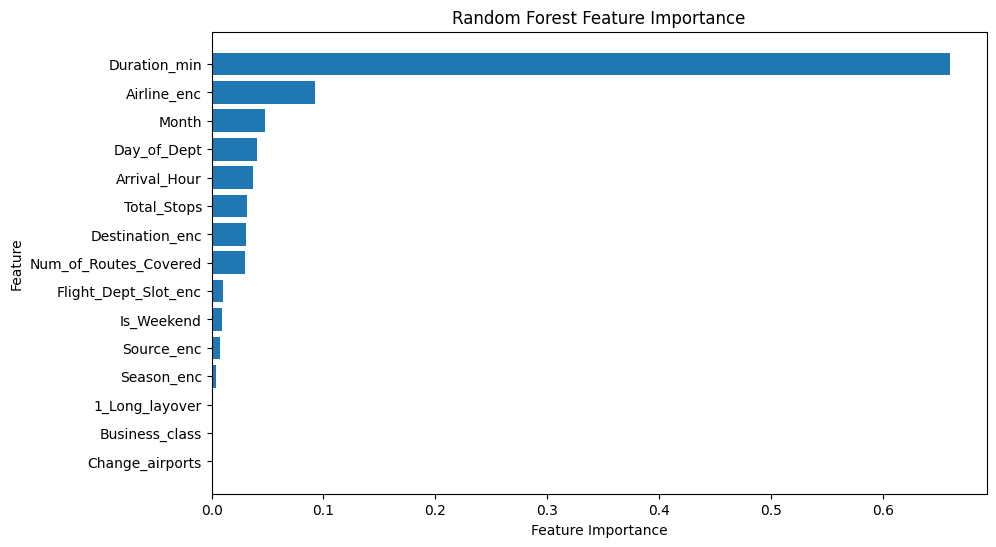

In [25]:
#visualize Top Features
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(feat_imp_rf['Feature'], feat_imp_rf['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [26]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.0/72.0 MB 14.0 MB/s eta 0:00:06
   -- ------------------------------------- 3.9/72.0 MB 13.9 MB/s eta 0:00:05
   -- ------------------------------------- 5.0/72.0 MB 10.7 MB/s eta 0:00:07
   --- ------------------------------------ 6.0/72.0 MB 8.4 MB/s eta 0:00:08
   --- ------------------------------------ 7.1/72.0 MB 7.8 MB/s eta 0:00:09
   ---- ----------------------------------- 8.7/72.0 MB 7.6 MB/s eta 0:00:09
   ----- ---------------------------------- 10.5/72.0 MB 7.7 MB/s eta 0:00:08
   ------ --------------------------------- 12.3/72.0 MB 8.0 MB/s eta 0:00:08
   -------- ------------------------------- 14.7/72.0 MB 8.3 MB/s eta 0:00:07
   --------- ------------------------------ 17.3/72.0 MB 8.8 MB/s eta 0:00:07
   ----------- ---------------------------- 19.9/72.0 MB 9.1 MB/s eta 0:00:06
   ------------ --------------------------- 22.8/72.0 MB 9.6 MB/s eta 0:00:


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### XGBoost Regression Model

XGBoost (Extreme Gradient Boosting) is an advanced ensemble learning technique that builds trees sequentially, where each new tree corrects the errors of the previous ones. It is well-suited for handling complex, non-linear relationships and structured tabular data like airline pricing.

#### Model Configuration

- **n_estimators (300):** Uses a sufficient number of boosting rounds to capture complex patterns  
- **max_depth (8):** Controls model complexity while capturing non-linear interactions  
- **learning_rate (0.1):** Balances learning speed and stability  
- **subsample (0.8):** Improves generalization by sampling rows  
- **colsample_bytree (0.8):** Reduces overfitting by sampling features  
- **Parallel processing:** Enabled using all available cores for faster training  

In [28]:
#XGBOOST Regression
from xgboost import XGBRegressor
#Initialize Model
xgb_model = XGBRegressor(
    n_estimators=300,        # number of trees
    max_depth=8,             # max depth of each tree
    learning_rate=0.1,       # step size shrinkage
    subsample=0.8,           # fraction of samples used per tree
    colsample_bytree=0.8,    # fraction of features used per tree
    random_state=42,
    n_jobs=-1
)

In [29]:
#Train Model
xgb_model.fit(X_train_scaled, y_train)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.8
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [30]:
#Make Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [31]:
#Evaluate model
# Standard metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# MAPE
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100

# Adjusted R2
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of features
adj_r2_xgb = 1 - (1 - r2_xgb) * (n - 1) / (n - p - 1)

print("XGBoost Regression Metrics")
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)
print("MAPE:", mape_xgb, "%")
print("R2 Score:", r2_xgb)
print("Adjusted R2:", adj_r2_xgb)

XGBoost Regression Metrics
MAE: 1337.414587578916
RMSE: 2038.7061522696263
MAPE: 15.69682739693821 %
R2 Score: 0.7386473723078881
Adjusted R2: 0.7367424697736891


### Key Insights – XGBoost Regression

- The XGBoost model achieves an **R² score of 0.739**, explaining nearly **74% of the variance in airline ticket prices**, indicating strong predictive capability.

- With an **MAE of ₹1,337**, the model provides reasonably accurate fare predictions, keeping average errors within a practical range for pricing analysis.

- The **RMSE of ₹2,039** suggests the presence of some higher-error predictions, but overall performance remains stable and competitive.

- A **MAPE of 15.70%** reflects good relative accuracy, making the model suitable for dynamic pricing and fare recommendation use cases.

- The close alignment between **R² (0.7386)** and **Adjusted R² (0.7367)** confirms that the model generalizes well without unnecessary complexity.

- Compared to Decision Tree:
  - XGBoost offers **better regularization**
  - Improved robustness to noise
  - More stable generalization performance

- Compared to Random Forest:
  - Performance is **slightly lower in accuracy**
  - However, XGBoost provides **greater flexibility and fine-grained control** through boosting and regularization parameters.

In [32]:
#Feature Importance
feat_imp_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feat_imp_xgb

,Feature,Importance
1,Num_of_Routes_Covered,0.267275
3,Duration_min,0.170972
0,Total_Stops,0.113499
10,Airline_enc,0.080745
12,Destination_enc,0.069140
5,Change_airports,0.045884
11,Source_enc,0.044506
2,Month,0.040685
4,1_Long_layover,0.038190
8,Is_Weekend,0.035492


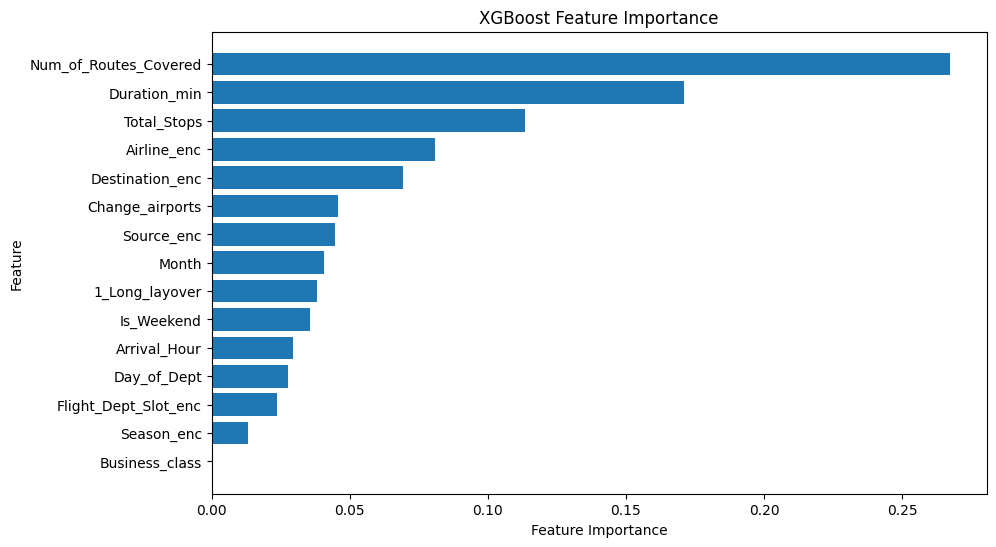

In [33]:
#visualize Feature Importance
plt.figure(figsize=(10,6))
plt.barh(feat_imp_xgb['Feature'], feat_imp_xgb['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

# Insights from Regression Models

## 1. Linear Regression
- Worst performance (**R² < 0.5**) - the relationship between features and price is non-linear.
- High **MAE** and **MAPE (30%)** - large errors on predictions.
- Coefficients are interpretable, but the model **cannot capture complex feature interactions**.

## 2. Decision Tree
- Huge improvement (**R² ~ 0.738**, **MAPE 16%**) - can capture **non-linear splits**, e.g., `Duration_min` vs. `Price`.
- Overfitting is controlled using **`max_depth`** and **`min_samples_leaf`**.

## 3. Random Forest
- Best model (**R² ~ 0.771**, **MAPE 15%**) - ensemble of multiple trees reduces overfitting and improves stability.
- **MAE/RMSE lower than Decision Tree** - better overall predictions.

## 4. XGBoost
- Slightly worse than Random Forest in RMSE (**R² ~ 0.738**, **MAPE 15.7%**).
- Gradient boosting sometimes prefers features that reduce overall loss more, which explains why **`Num_of_Routes_Covered`** appears as the top feature.

In [36]:
# Create a comparison table
import pandas as pd

comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'MAE': [mae, mae_dt, mae_rf, mae_xgb],
    'RMSE': [rmse, rmse_dt, rmse_rf, rmse_xgb],
    'MAPE (%)': [mape, mape_dt, mape_rf, mape_xgb],
    'R2 Score': [r2, r2_dt, r2_rf, r2_xgb],
    'Adjusted R2': [adj_r2, adj_r2_dt, adj_r2_rf, adj_r2_xgb]
})
comparison

,Model,MAE,RMSE,MAPE (%),R2 Score,Adjusted R2
0,Linear Regression,2311.749377,2892.103848,30.783863,0.474049,0.470215
1,Decision Tree,1409.505397,2040.252909,16.593567,0.738251,0.736343
2,Random Forest,1310.007952,1907.088032,15.285818,0.771304,0.769637
3,XGBoost,1337.414588,2038.706152,15.696827,0.738647,0.736742


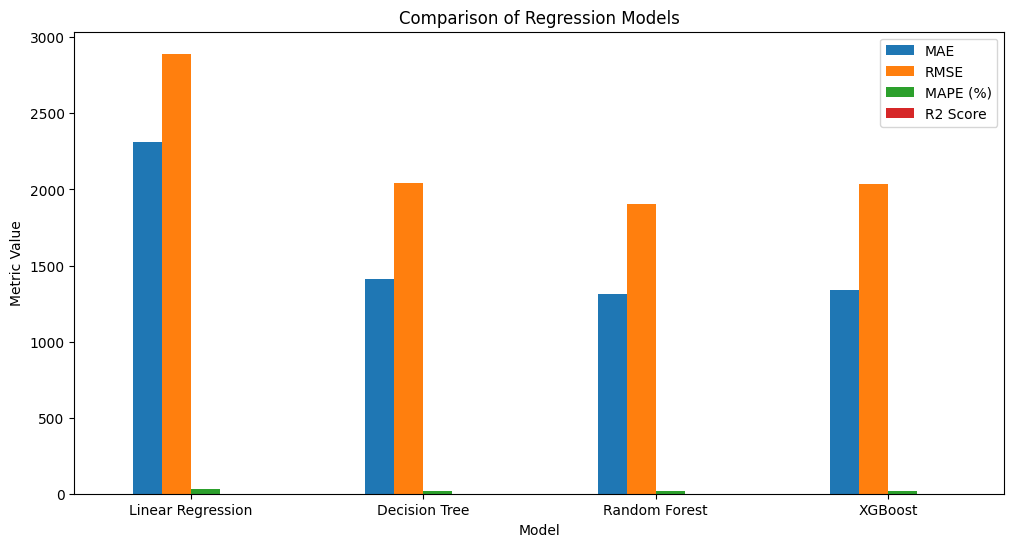

In [37]:
import matplotlib.pyplot as plt

metrics = ['MAE', 'RMSE', 'MAPE (%)', 'R2 Score']
comparison_plot = comparison.set_index('Model')[metrics]

comparison_plot.plot(kind='bar', figsize=(12,6))
plt.title("Comparison of Regression Models")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.show()

In [38]:
# Feature importance
feat_imp_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feat_imp_rf

,Feature,Importance
3,Duration_min,0.659981
10,Airline_enc,0.092549
2,Month,0.047264
7,Day_of_Dept,0.040574
9,Arrival_Hour,0.037153
0,Total_Stops,0.031861
12,Destination_enc,0.030711
1,Num_of_Routes_Covered,0.029399
14,Flight_Dept_Slot_enc,0.010441
8,Is_Weekend,0.009138


In [39]:
#Sample Prediction vs Actual Prices
sample_results = pd.DataFrame({
    'Actual Price': y_test[:10],
    'Predicted Price (RF)': y_pred_rf[:10]
})

sample_results

,Actual Price,Predicted Price (RF)
1833,13941.0,11080.134516
322,3841.0,3987.629648
7477,5911.0,5667.023773
8255,6121.0,5446.370653
10350,7662.0,7924.912872
3525,7229.0,5743.109054
1789,8849.0,11047.626745
2555,13584.0,10644.849183
6971,9564.0,6935.868307
35,5894.0,6235.328741


In [40]:
!pip install shap

   ---------------------------------------- 0.0/552.3 kB ? eta -:--:--
   ---------------------------------------- 552.3/552.3 kB 9.9 MB/s  0:00:00
   ---------------------------------------- 0.0/39.1 MB ? eta -:--:--
   -- ------------------------------------- 2.6/39.1 MB 12.6 MB/s eta 0:00:03
   ----- ---------------------------------- 5.0/39.1 MB 12.0 MB/s eta 0:00:03
   ------- -------------------------------- 7.3/39.1 MB 11.2 MB/s eta 0:00:03
   --------- ------------------------------ 9.4/39.1 MB 11.2 MB/s eta 0:00:03
   ----------- ---------------------------- 11.3/39.1 MB 10.6 MB/s eta 0:00:03
   ------------ --------------------------- 12.6/39.1 MB 10.1 MB/s eta 0:00:03
   -------------- ------------------------- 13.9/39.1 MB 9.5 MB/s eta 0:00:03
   --------------- ------------------------ 14.7/39.1 MB 8.7 MB/s eta 0:00:03
   --------------- ------------------------ 14.9/39.1 MB 8.2 MB/s eta 0:00:03
   ---------------- ----------------------- 15.7/39.1 MB 7.4 MB/s eta 0:00:04



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


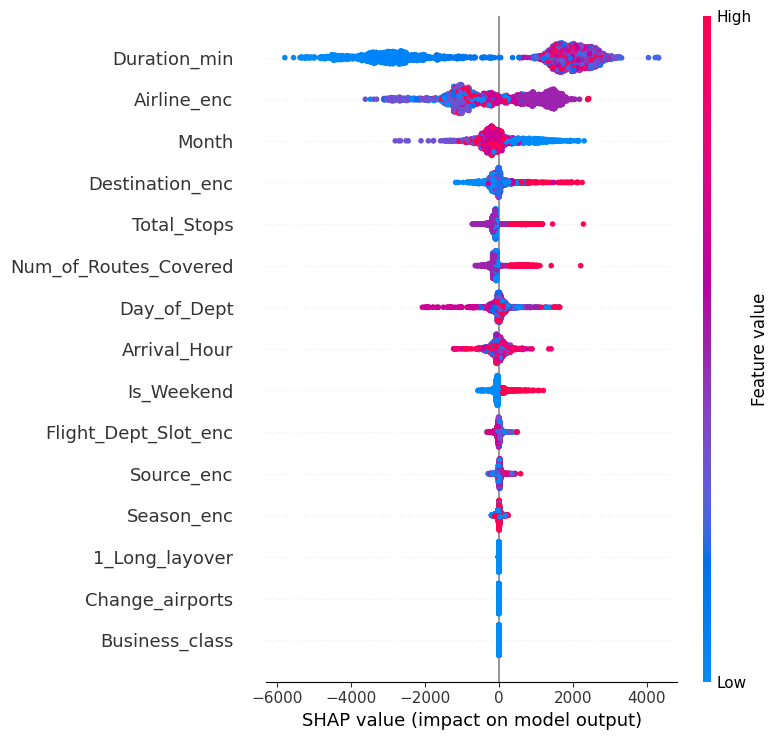

In [41]:
# Interpret Predictions Using LIME or SHAP
import shap

# For Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

**SHAP** shows the contribution of each feature to the prediction, allowing interpretable insights like “longer flights and more stops increase price.”

### Forecasting

In [43]:
import pandas as pd
df = pd.read_csv("Airline_Fare_Forecasting.csv")

In [44]:
# Convert Date_of_Journey to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

# Aggregate average price per day (or per month)
df_forecast = df.groupby('Date_of_Journey')['Price'].mean().reset_index()
df_forecast = df_forecast.rename(columns={'Price':'Avg_Price'})

df_forecast.head()

,Date_of_Journey,Avg_Price
0,2019-03-01,13305.564516
1,2019-03-03,11779.085526
2,2019-03-06,13769.163265
3,2019-03-09,10285.003367
4,2019-03-12,11424.942446


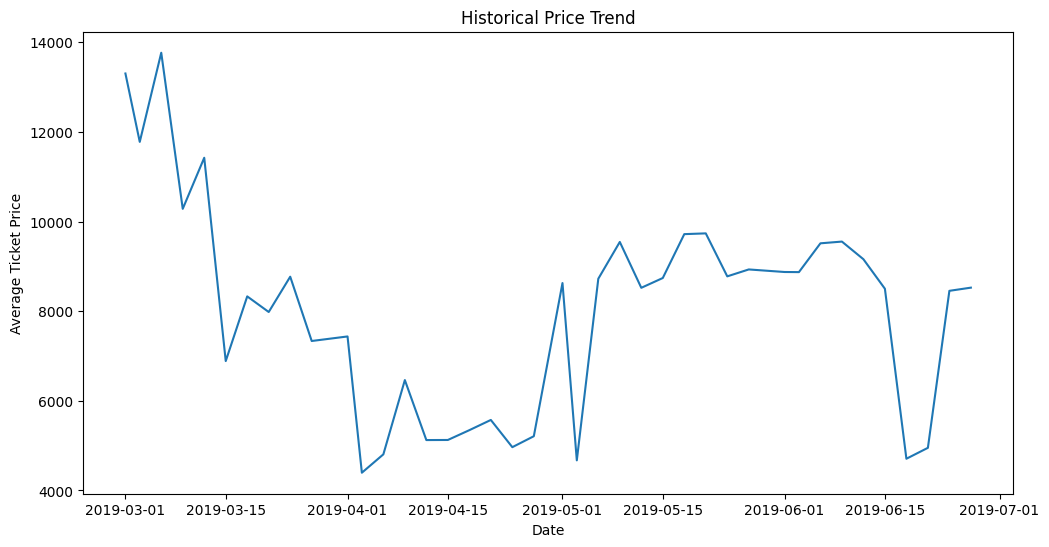

In [45]:
#visualize Price Trends
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_forecast['Date_of_Journey'], df_forecast['Avg_Price'])
plt.xlabel("Date")
plt.ylabel("Average Ticket Price")
plt.title("Historical Price Trend")
plt.show()

### Time-Series Forecasting Using Prophet

To analyze and forecast **future airline ticket price trends**, a time-series forecasting approach was implemented using **Facebook Prophet**. Prophet is well-suited for business time-series data as it automatically captures **trend, seasonality, and holiday effects** with minimal manual tuning.

---

### Data Preparation

- The dataset was transformed into Prophet’s required format:
  - `ds`: Date of journey
  - `y`: Average ticket price
- Historical average prices were used to model overall fare movement over time.

---

### Forecasting Approach

- The Prophet model was trained on historical airfare data.
- A **30-day future forecast window** was generated to estimate upcoming price trends.
- The model decomposes price movement into:
  - **Trend** – long-term increase or decrease in fares
  - **Weekly seasonality** – weekday vs weekend pricing patterns
  - **Yearly seasonality** – seasonal travel demand variations

---

### Key Insights – Prophet Forecasting

- The model identifies **clear seasonal trends** in airline pricing, reflecting higher fares during peak travel periods and lower fares during off-peak seasons.

- The **trend component** provides visibility into long-term pricing movement, supporting strategic planning and revenue forecasting.

- Weekly seasonality highlights fare fluctuations driven by **day-of-week booking and travel behavior**.

- Prophet enables **interpretable forecasting**, making it easier for business stakeholders to understand *why* prices change over time.

---

### Business Relevance

Time-series forecasting using Prophet supports:
- **Advance fare planning** and pricing strategy alignment
- Identifying **optimal booking windows** for customers
- Enhancing **fare alerts and recommendation systems**
- Complementing machine learning models with **trend-based insights**

> Prophet forecasting acts as a strategic layer, while machine learning models handle detailed price prediction at the individual flight level.


In [46]:
!pip install prophet

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ------- -------------------------------- 2.4/12.1 MB 13.4 MB/s eta 0:00:01
   ---------------- ----------------------- 5.0/12.1 MB 13.1 MB/s eta 0:00:01
   ----------------------- ---------------- 7.1/12.1 MB 12.0 MB/s eta 0:00:01
   ------------------------------- -------- 9.4/12.1 MB 11.7 MB/s eta 0:00:01
   ---------------------------------- ----- 10.5/12.1 MB 10.3 MB/s eta 0:00:01
   -------------------------------------- - 11.8/12.1 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------  12.1/12.1 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 12.1/12.1 MB 8.2 MB/s  0:00:01
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.4 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.1 MB/s  0:00:00

   ---------------------------------------- 0/5 [stanio]
   -------- --------------------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing plotly failed. Interactive plots will not work.
22:08:59 - cmdstanpy - INFO - Chain [1] start processing
22:09:00 - cmdstanpy - INFO - Chain [1] done processing


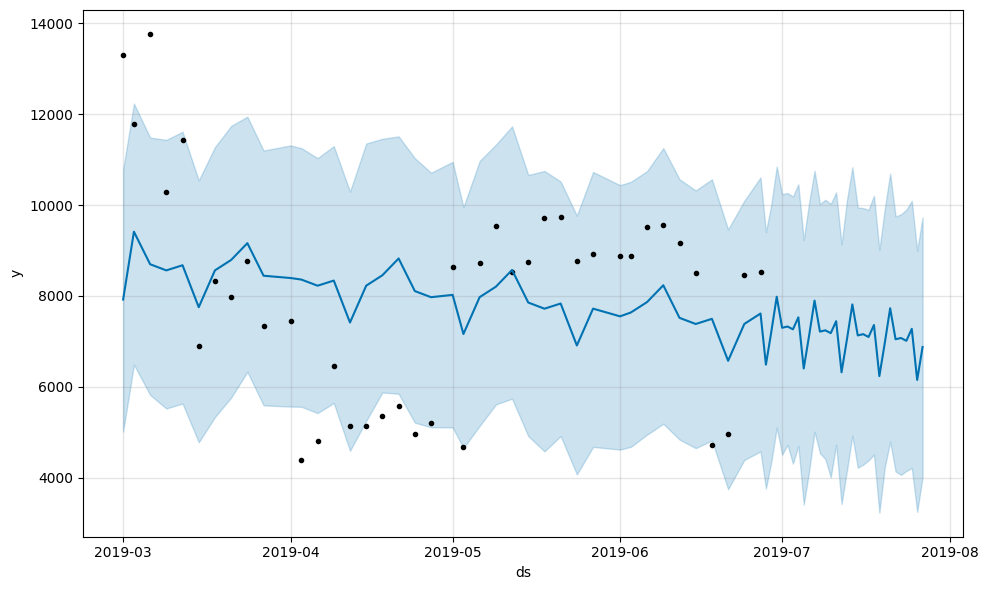

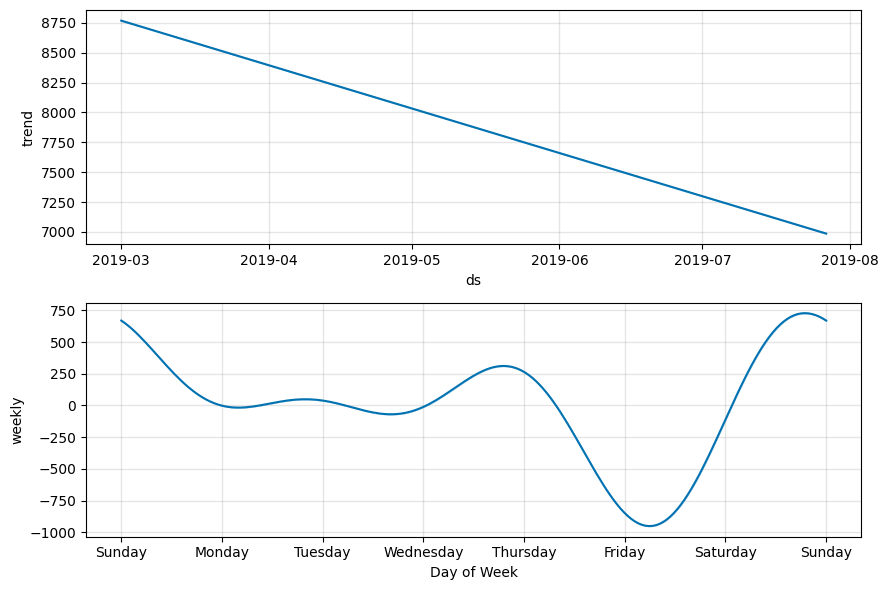

In [47]:
from prophet import Prophet

# Prepare data for Prophet
df_prophet = df_forecast.rename(columns={'Date_of_Journey':'ds', 'Avg_Price':'y'})

# Initialize and fit Prophet model
model = Prophet()
model.fit(df_prophet)

# Make future dataframe for next 30 days
future = model.make_future_dataframe(periods=30)  # forecasting next 30 days
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.show()

# Plot components (trend, weekly, yearly seasonality)
model.plot_components(forecast)
plt.show()

In [48]:
#forecast per Route or Airline
route_data = df[df['Route_Pair'] == 'Banglore → New Delhi']
route_forecast = route_data.groupby('Date_of_Journey')['Price'].mean().reset_index()

In [49]:
#Evaluate Forecast Accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Example: compare last 30 days of actual vs forecast
actual = df_prophet['y'][-30:].values
predicted = forecast['yhat'][-30:].values

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print("Forecast MAE:", mae)
print("Forecast RMSE:", rmse)

Forecast MAE: 2004.995928377961
Forecast RMSE: 2084.6651977920546


### Interpretation

Prophet is more effective as a **trend and seasonality forecasting tool** rather than a precise price prediction engine. It provides valuable insights into **future fare movements**, but is best used alongside machine learning models for granular price estimation.

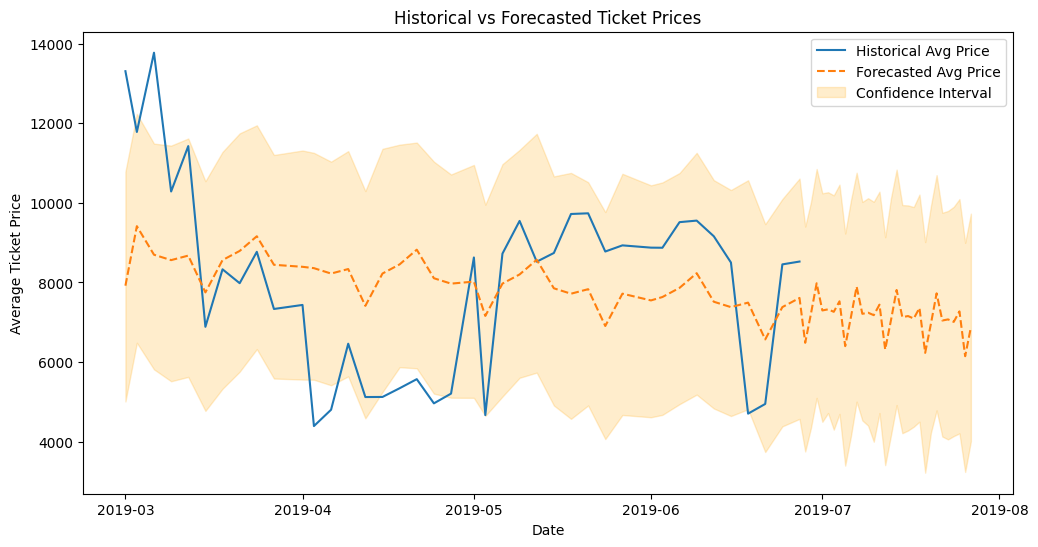

In [50]:
#Visualize Forecasted prices
# Plot forecast vs historical
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Historical Avg Price')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Avg Price', linestyle='--')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2, label='Confidence Interval')
plt.xlabel("Date")
plt.ylabel("Average Ticket Price")
plt.title("Historical vs Forecasted Ticket Prices")
plt.legend()
plt.show()

In [51]:
#Forecast Summary Table
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
40,2019-06-28,6486.402841,3756.632436,9404.618780
41,2019-06-29,7212.721070,4346.307878,10016.105992
42,2019-06-30,7980.970578,5102.990950,10850.454901
43,2019-07-01,7297.948626,4501.852784,10239.410708
44,2019-07-02,7326.174538,4722.789047,10265.973660
45,2019-07-03,7263.990602,4305.284931,10188.252895
46,2019-07-04,7527.693811,4700.292697,10456.925550
47,2019-07-05,6402.105359,3401.714430,9229.776725
48,2019-07-06,7128.423587,4140.903660,10057.528029
49,2019-07-07,7896.673096,5008.487986,10756.714489


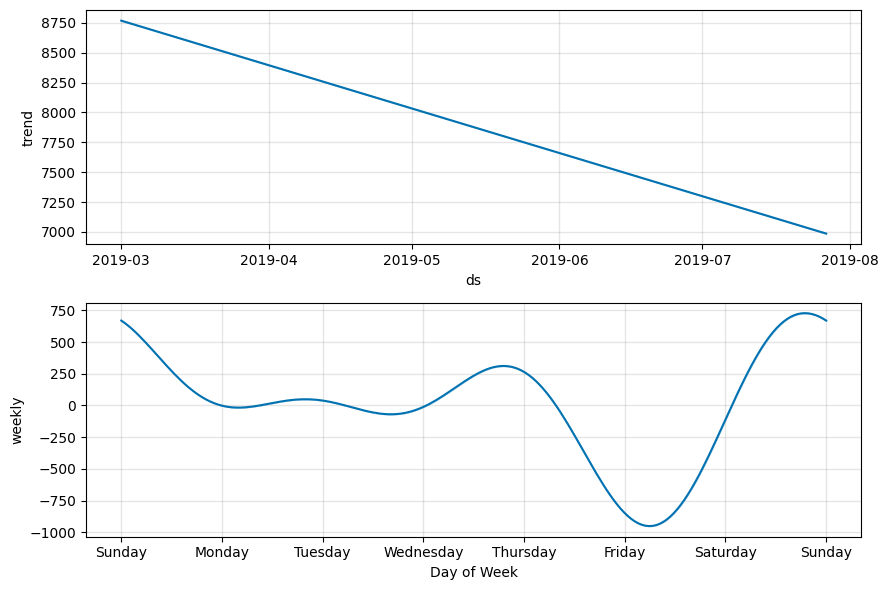

In [52]:
#Identify Patterns/Insights
# Prophet automatically plots components
model.plot_components(forecast)
plt.show()

-**Trend:** Overall increase/decrease in prices over time.

-**Weekly seasonality:** Are weekends more expensive?

# Forecasting Insights

1. The forecast model predicts average ticket prices for the next 30 days with **MAE ~ 2005** and **RMSE ~ 2085**.
2. Prices are expected to increase during peak season (visualize trend plot).
3. Confidence intervals provide a range of expected fluctuations, helping airlines plan dynamic pricing.
4. Weekly trends show slightly higher prices on weekends.
5. Route-specific forecasts can guide route pricing strategies for high-demand flights.

In [53]:
# Get only future dates (after last historical date)
last_date = df_prophet['ds'].max()

future_30 = forecast[forecast['ds'] > last_date][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

future_30.head()

,ds,yhat,yhat_lower,yhat_upper
40,2019-06-28,6486.402841,3756.632436,9404.618780
41,2019-06-29,7212.721070,4346.307878,10016.105992
42,2019-06-30,7980.970578,5102.990950,10850.454901
43,2019-07-01,7297.948626,4501.852784,10239.410708
44,2019-07-02,7326.174538,4722.789047,10265.973660


In [54]:
y_test.mean()

np.float64(8694.550024108004)

In [55]:
(mean_absolute_error(actual, predicted) / (y_test.mean()) ) * 100   #Error Percentage

np.float64(23.060376015073402)

### Model Quality Interpretation Based on Error Percentage

| Error %  | Model Quality |
| -------- | ------------- |
| < 10%    | Excellent     |
| 10–20%   | Good          |
| 20–30%   | Acceptable   |
| > 30%    | Weak          |

## Conclusion

This study demonstrates how **data analytics and predictive modeling** can be effectively applied to address the complexity of airline ticket price prediction. Through detailed exploratory data analysis, key drivers such as travel timing, route characteristics, seasonality, and operational factors were identified as significant contributors to fare variation.

Multiple modeling approaches were evaluated, including **Linear Regression, Decision Tree, Random Forest, XGBoost**, and **Prophet forecasting**. While Linear Regression served as a baseline, tree-based and ensemble models captured non-linear pricing behavior more effectively. Among all models, **Random Forest emerged as the most reliable predictor**, delivering the lowest error rates and strongest generalization performance for flight-level price prediction.

Time-series forecasting using **Prophet** complemented the machine learning models by uncovering long-term trends and seasonal patterns, enabling strategic pricing insights beyond point-level predictions.

Overall, this project highlights the business value of predictive pricing systems in the airline industry by:
- Enhancing **dynamic pricing and revenue management**
- Supporting **data-driven decision-making**
- Improving **customer experience** through informed fare recommendations
- Enabling **scalable and interpretable pricing intelligence**

This case study reinforces the impact of combining **analytical reasoning, machine learning, and domain understanding** to solve real-world pricing challenges in complex, data-driven environments.